We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
dataset = load_boston()

In [150]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [151]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [152]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that the target value by the name MEDV is missing from the dataframe. It is present in dataset.target.
Let's add that to the df.

In [153]:
df['MEDV'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Are there any null values in the dataset?

In [154]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Even though there are none, it's a good practice to check.

#### Exploratory Data Analysis


We here use distplot method from the seaborn library, which is another popular graphing library for Python.

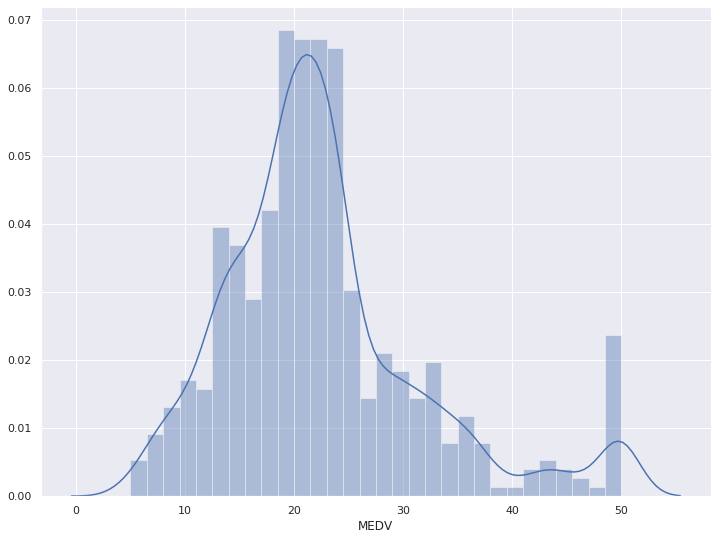

In [155]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We can see that it mostly normally distributed with a few outliers.

## Linear Regression - Assignment

We'll work with the above dataset for the assignment below. Create a blank notebook for the assignment.

### Question 1

1. Normalize the data using StandardScaler from sklearn. [0.5]
2. Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer. [1]
3. What is the best lambda where the best fit occurs? Use this best lambda from here on out. [Note: You may be surprised by the best lambda here - this won't be the case for all datasets.] [1]

In [156]:
df_x = df.drop('MEDV', axis =1)
print(df_x.head())
print(df_x.shape)

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
(506, 13)


In [0]:
# 1. Normalize the data using StandardScaler from sklearn.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_x) # Normalizing X 
df_scaled_x = pd.DataFrame(scaler.transform(df_x), columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'])

df_scaled_x.head()

X = df_scaled_x
y = df['MEDV']


In [0]:
# 2. Split the multivariate data into training/validation data (20% validation data) and plot train error and 
#    validation error as a function of the lambda regularizer.


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42) #splitting data

In [159]:
X_train_mat = np.hstack((np.ones((404,1)), X_train)) #X matrix for Linear Reg
Y_train_mat =  y_train.values.reshape(-1,1) # Y matrix for Linear Reg

X_train_mat

array([[ 1.        ,  1.32780421, -0.48772236, ...,  0.80657583,
        -0.07887794,  1.7181012 ],
       [ 1.        , -0.34750602, -0.48772236, ...,  1.17646583,
         0.42701755, -0.5863558 ],
       [ 1.        , -0.41648392,  1.01446252, ..., -0.71922039,
         0.06113692, -0.67606702],
       ...,
       [ 1.        , -0.41877066,  2.94584308, ..., -0.67298414,
         0.37570436, -0.93398678],
       [ 1.        ,  0.87825441, -0.48772236, ...,  0.80657583,
        -2.70626713,  1.48821619],
       [ 1.        , -0.39389588, -0.48772236, ...,  1.13022958,
        -3.13442533, -0.28358043]])


## Multivariate Linear Regression without regularization

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X_train_mat.T, X_train_mat)), np.dot(X_train_mat.T, Y_train_mat))
# prediction
yTrainPred = np.dot(X_train_mat, w)

In [161]:
print("Consider MSE as metric for training error")
print('Training MSE: ', sum((yTrainPred-Y_train_mat)**2)/len(yTrainPred))

Consider MSE as metric for training error
Training MSE:  [21.64141275]


In [0]:
X_test_mat = np.hstack((np.ones((102,1)), X_test)) #X matrix for Linear Reg
Y_test_mat =  y_test.values.reshape(-1,1) # Y matrix for Linear Reg

In [163]:
yTestPred = np.dot(X_test_mat,w)

print('Testing MSE: ', sum((yTestPred-Y_test_mat)**2)/len(yTestPred))

len(yTestPred)

Testing MSE:  [24.29111947]


102

## Regularizing with non zero parameter

In [0]:
λ = [0,0.5,1,3,4,10,15,20,30,40,50,70,80,90,100]  #regularization with lambda
f = 14
w_matrix_form = []
trainReguError = []
testReguError = []
for i in λ:
    w = np.dot(np.linalg.inv(np.dot(X_train_mat.T, X_train_mat) + (i)*np.identity(f)), np.dot(X_train_mat.T, Y_train_mat))
    
    w_matrix_form.append([w])
    # prediction
    yTrainPredRegu = np.dot(X_train_mat, w)

    trainReguError.append(sum((yTrainPredRegu-Y_train_mat)**2)/len(yTrainPredRegu))
    
    yTestPredRegu = np.dot(X_test_mat, w)

    testReguError.append(sum((yTestPredRegu-Y_test_mat)**2)/len(yTestPredRegu))
    

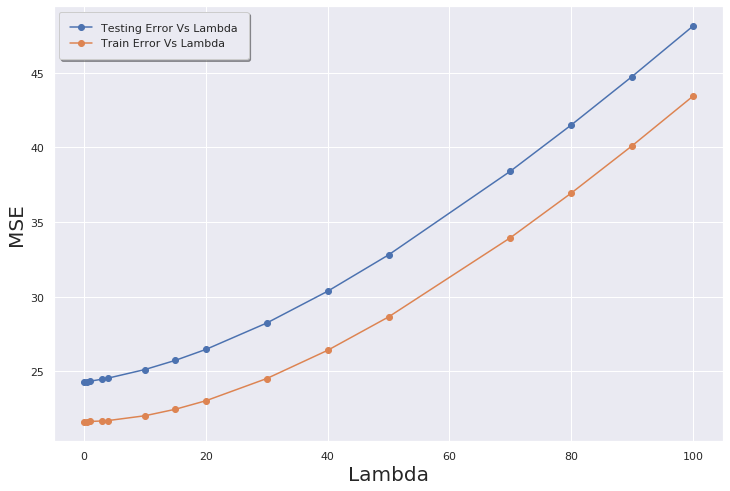

In [165]:
plt.figure(figsize=(12, 8))
plt.plot(λ,testReguError,'o-', label = 'Testing Error Vs Lambda')
plt.plot(λ,trainReguError,'o-',label = 'Train Error Vs Lambda')
plt.xlabel('Lambda', size = 20)
plt.ylabel('MSE', size = 20)
plt.legend(['Test Curve', 'Train Curve'])
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()


In [166]:
min(trainReguError), min(testReguError)

(array([21.64141275]), array([24.29111947]))

### Question 2

1. Derive the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$. Show your work (either by using in-line equations like we do here, or taking a picture of your work, and emdedding it in the notebook). [1]

Answer - [Derivation of cost function](https://drive.google.com/file/d/1PQDyri-4p9gVKTUKJ0-Nm7CJkhgKUx5S/view?usp=sharing)

### Question 3

1. Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2. [1.5]

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda. [1]

#### Gradient Descent with Lambda

In [0]:
def gradientDescent(X, y, theta, alpha, num_iters, λ = 10): # alpha = 0.01, lambda = 10
    """
       Performs gradient descent to learn theta
    """
    f = 14
    m = y.size  # number of training examples
    for i in range(num_iters):
        y_hat = np.dot(X, theta)
        theta = theta - alpha * (1.0/m) * (np.dot(X.T, y_hat-y) + np.dot((λ)*np.identity(f),theta))
    return theta


In [168]:
epocs = [1,100,500,1000,1500,2000,3000,3500,4000,5000]
test_error_epocs = []
train_error_epocs = []
w_gd_form = {}
# alha = 0.01
for x in epocs:
    w_gd = gradientDescent(X_train_mat, Y_train_mat, np.array(14*[1]).reshape(-1,1), 0.01,x)
    w_gd_form[x] = w_gd
    train_error_epocs.append(sum((np.dot(X_train_mat,w_gd)-Y_train_mat)**2)/len(X_train_mat))
    test_error_epocs.append(sum((np.dot(X_test_mat,w_gd)-Y_test_mat)**2)/len(X_test_mat))

test_error_epocs

[array([519.49257997]),
 array([99.54850079]),
 array([27.92351317]),
 array([26.16138993]),
 array([25.61619654]),
 array([25.38706752]),
 array([25.21662024]),
 array([25.18226123]),
 array([25.16148571]),
 array([25.14037465])]

In [169]:

#Test for convergence:
# ---> Acceptance criteria for convergence: Change in MSE < 1 % 
get_ipython().magic('matplotlib inline')

plt.figure(figsize=(12, 8))
change = {}
for i in range(0,len(test_error_epocs)-1):
    change[epocs[i+1]] = list((test_error_epocs[i]-test_error_epocs[i+1])/test_error_epocs[i]*100)

<Figure size 864x576 with 0 Axes>

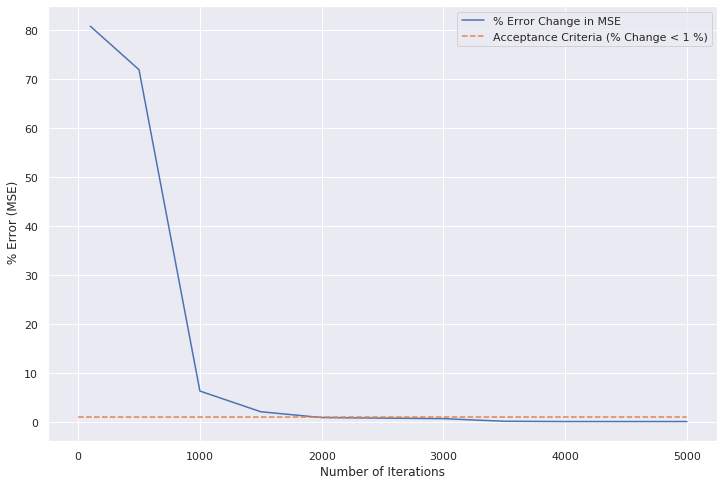

In [170]:

plt.figure(figsize=(12,8))
plt.plot(list(change.keys()), list(change.values()))
plt.plot(range(5000), 5000*[1], '--')
plt.xlabel('Number of Iterations')
plt.ylabel(' % Error (MSE)')
plt.legend(['% Error Change in MSE', 'Acceptance Criteria (% Change < 1 %)'])
# Thus convergence is achieved around 2000 iteration

No handles with labels found to put in legend.


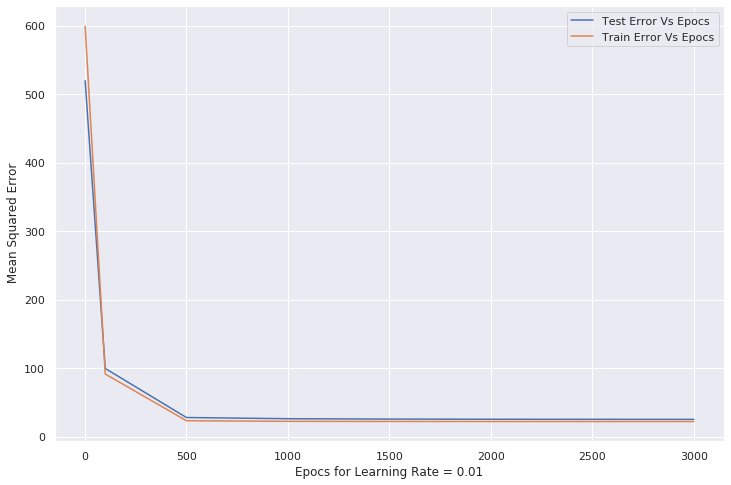

In [171]:
plt.figure(figsize=(12, 8))
plt.plot(epocs[:-3], test_error_epocs[:-3])
plt.plot(epocs[:-3], train_error_epocs[:-3])
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.xlabel('Epocs for Learning Rate = 0.01')
plt.ylabel(' Mean Squared Error')
plt.legend(['Test Error Vs Epocs', 'Train Error Vs Epocs'])

No handles with labels found to put in legend.


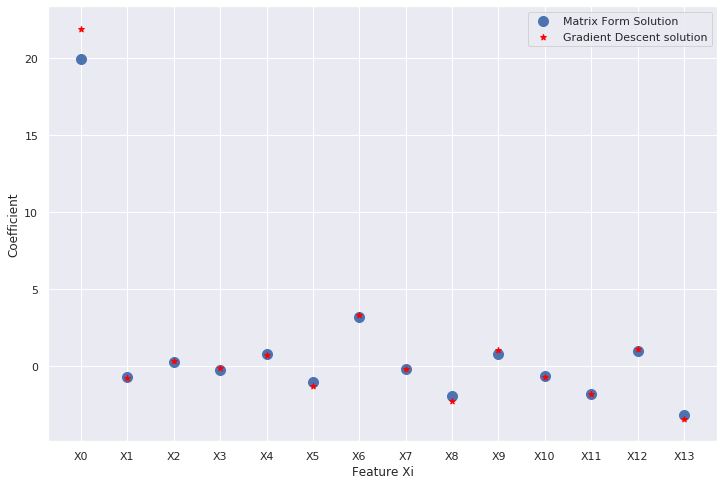

In [179]:
plt.figure(figsize=(12, 8))
plt.scatter(['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13'],w_matrix_form[10], marker = 'o',s = 100)
plt.scatter(['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13'],w_gd_form[1000], marker = '*', color = 'red')
plt.xlabel('Feature Xi')
plt.ylabel('Coefficient')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.legend(['Matrix Form Solution','Gradient Descent solution'])

### Question 4

1. Plot training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line. [1]

For very low $\eta$, gradient descent should be slow to converge.  For very high $\eta$, the error might be very unstable (i.e., not decreasing on every epoch).

In [0]:
epocs = [1,100,200,300,500,600,1000,2000,2500,3000,3500,4000,4500,5000,10000,20000]
alpha = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
test_error_epocs = []
train_error = {}
# alha = 0.01

for ita in alpha:
    test_error_epocs = []
    for x in epocs:
        w = gradientDescent(X_train_mat, Y_train_mat, np.array(14*[1]).reshape(-1,1), ita,x)

        test_error_epocs.append(sum((np.dot(X_test_mat,w)-Y_test_mat)**2)/len(X_test_mat))
        
    train_error[ita] =  test_error_epocs

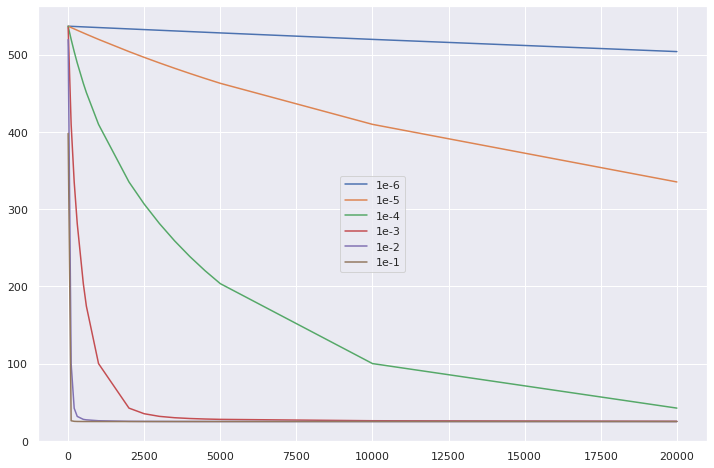

In [181]:
plt.figure(figsize=(12, 8))
plt.plot(epocs,train_error[1e-6])
plt.plot(epocs,train_error[1e-5])
plt.plot(epocs,train_error[1e-4])
plt.plot(epocs,train_error[1e-3])
plt.plot(epocs,train_error[1e-2])
plt.plot(epocs,train_error[1e-1])
plt.legend(['1e-6', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1'])

### Question 5

Implement a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.  

1. Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]

2. All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1] -----> B-1 leads to fastest convergence in terms of "Wall-clock time". (It converges withing firt few iteration)

In [0]:
def batchGradientDescent(X, y, w = np.random.randn(14,1), lr=0.01, iterations=100, λ=0, bs=128):
    
    import datetime
    #timeHistory = []
    #costHistory = []
    f = 14
    m, n = X_train_mat.shape
    np.random.seed(0)
    # these are used to stored the cost and time
    costHistory = np.zeros(iterations)
    timeHistory = []
    trainError = []
    w_history = np.zeros(iterations)
    time_start = datetime.datetime.now()
    trainErrorUpdates = []
    for itr in range(iterations):
        
        w_itr_batch = {}
        mini_batches = []

        num_complete_minibatches=int(np.floor(m/bs))
        
        np.random.seed(42) # Set random seed to 42
        perm = np.random.permutation(len(X_train_mat)) # Create permutation object
        shuffled_X = X_train_mat[perm] # Apply shuffling on X
        shuffled_y = Y_train_mat[perm]

        for i in range(num_complete_minibatches):
            mini_batch_X=shuffled_X[i*bs:(i+1)*bs,:]
            mini_batch_y=shuffled_y[i*bs:(i+1)*bs]

            mini_batch = (mini_batch_X, mini_batch_y)
            mini_batches.append(mini_batch)

        for batch_num in range(len(mini_batches)):
          
            X_train = mini_batches[batch_num][0] #X is stored as an array in the first index of list object
            Y_train = mini_batches[batch_num][1] # Y is stored as an array in second index of list object

            # Gradient descent for each batch
            y_hat = np.dot(X_train, w)

            w = w - lr * (1.0/len(X_train)) * (np.dot(X_train.T, y_hat-Y_train))
            trainErrorUpdates.append(sum((np.dot(X_train,w)-Y_train)**2)/len(X_train)) #Taking MSE for each gradient Update
        trainError.append(sum((np.dot(X_train,w)-Y_train)**2)/len(X_train)) # MSE for each Iteration
          
        time_end = datetime.datetime.now()
        timeHistory.append(time_end-time_start)
    return w,trainError,timeHistory,trainErrorUpdates


In [0]:
w_1,te_1,th_1,teu_1 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=0.01, iterations=100, λ=0, bs=1)
w_2,te_2,th_2,teu_2 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=0.01, iterations=100, λ=0, bs=16)
w_3,te_3,th_3,teu_3 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=0.01, iterations=100, λ=0, bs=128)
w_4,te_4,th_4,teu_4 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=0.01, iterations=100, λ=0, bs=256)
w_5,te_5,th_5,teu_5 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=0.01, iterations=100, λ=0, bs=404)

Text(0.5, 1.0, 'Train Error Vs Number of Gradient Updates')

<Figure size 432x288 with 0 Axes>

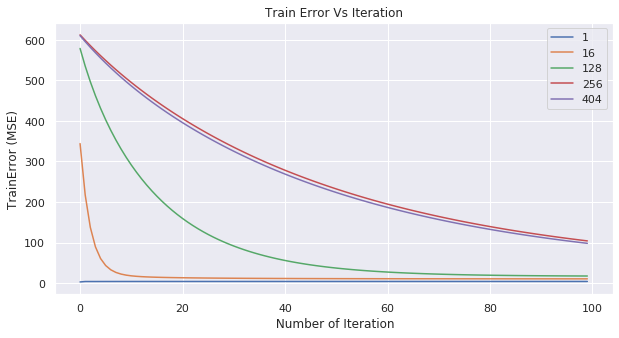

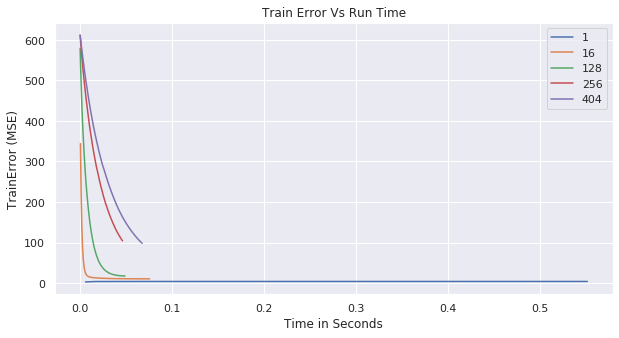

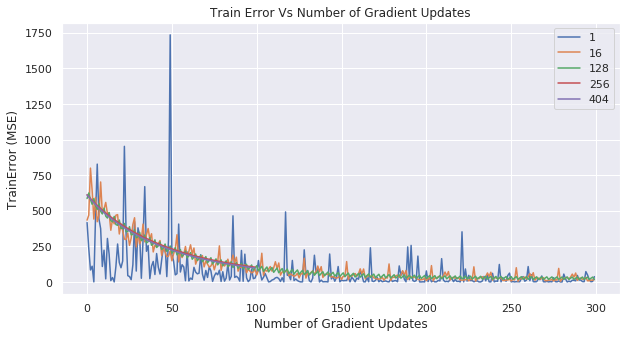

In [185]:

plt.figure(1)
plt.figure(figsize=(10, 5))
plt.plot([i for i in range(len(te_1))],te_1)
plt.plot([i for i in range(len(te_2))],te_2)
plt.plot([i for i in range(len(te_3))],te_3)
plt.plot([i for i in range(len(te_4))],te_4)
plt.plot([i for i in range(len(te_5))],te_5)
plt.legend(['1','16','128','256','404'])
plt.xlabel(' Number of Iteration')
plt.ylabel('TrainError (MSE)')
plt.title('Train Error Vs Iteration')

plt.figure(2)
plt.figure(figsize=(10, 5))
plt.plot([i.microseconds/1e6 for i in th_1],te_1)
plt.plot([i.microseconds/1e6 for i in th_2],te_2)
plt.plot([i.microseconds/1e6 for i in th_3],te_3)
plt.plot([i.microseconds/1e6 for i in th_4],te_4)
plt.plot([i.microseconds/1e6 for i in th_5],te_5)

plt.legend(['1','16','128','256','404'])
plt.xlabel('Time in Seconds')
plt.ylabel('TrainError (MSE)')
plt.title('Train Error Vs Run Time')

plt.figure(3)
plt.figure(figsize=(10, 5))
plt.plot([i for i in range(len(teu_1))][:300],teu_1[0:300])
plt.plot([i for i in range(len(teu_2))][:300],teu_2[0:300])
plt.plot([i for i in range(len(teu_3))][:300],teu_3[0:300])
plt.plot([i for i in range(len(teu_4))][:300],teu_4[0:300])
plt.plot([i for i in range(len(teu_5))][:300],teu_5[0:300])

plt.legend(['1','16','128','256','404'])
plt.xlabel('Number of Gradient Updates')
plt.ylabel('TrainError (MSE)')
plt.title('Train Error Vs Number of Gradient Updates')

### Question 6


1. Switch to absolute error for loss but still use $L_2$ regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5]


2. Tune $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).  Is it easier to train with squared error or absolute error, why?  Show some plots that help you demonstrate this point and explain. [1] -----> It is easier to train with squared error because derivative of squared error cost function is continuous. So with fixed learning rate also it converges. Gradient is high for larger loss values and decreases as loss approaches zero which makes it more precise at the end of training whereas derivative of absolute error is not continuous. so gradient is large even for small loss values. So makes it inefficient to find the solution.

Answer 6.1 -----> 
[Derivation fro gradient with absolutr error](https://drive.google.com/file/d/1xXSN39R0WDbHV4qtaAVwqM-Fx8kVtOzV/view?usp=sharing)

### Taking graphical approach to identify best pair of Learning Rate and Batch size for convergence.

Consider Following values: lr = [1e-6, 1e-4, 1e-3, 1e-1]; B = [1,16,128,256,404].
Like Hyperparameter tuning which does exhaustive search in parameter space, we are plotting TrainError(MSE) vs Number of Gradient Updates to see how error is reducing with each update in weights (w). The best pair would be one that is stable (less noisy) and converges fastest i.e TrainError curve flatens.

For this, i am consider combination of both time taken to reach convergence and noisiness in error as a criteria to decide best pair. For example, we want faster but stable pair of learning rate and B. Following graphs will give us qualitative estimate of which pair is ideal for our purpose

<Figure size 432x288 with 0 Axes>

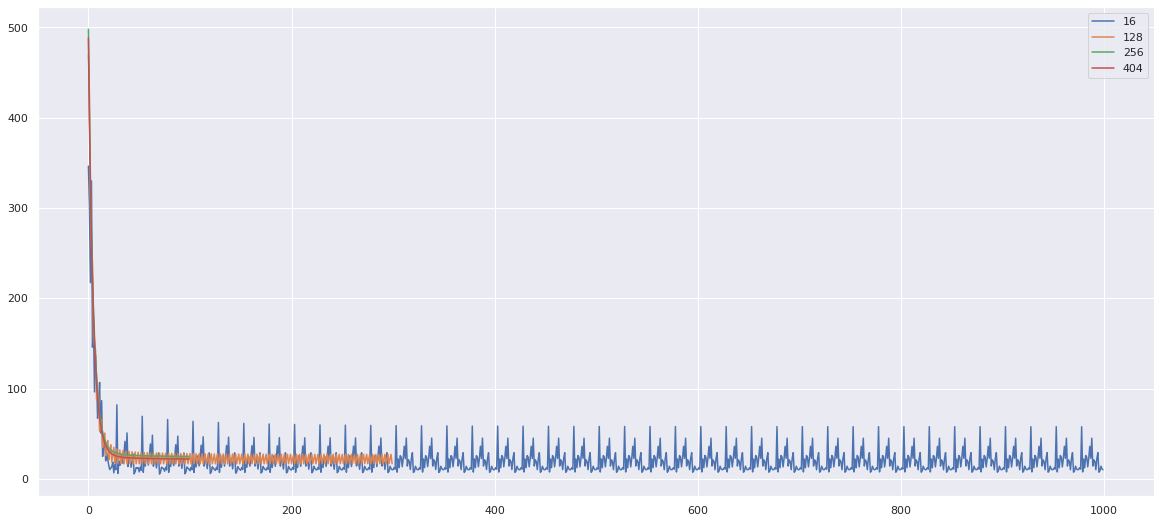

In [189]:
# Ita  = 1e-1

w_1,te_1,th_1,teu_1 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-1, iterations=100, λ=0, bs=1)
w_2,te_2,th_2,teu_2 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-1, iterations=100, λ=0, bs=16)
w_3,te_3,th_3,teu_3 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-1, iterations=100, λ=0, bs=128)
w_4,te_4,th_4,teu_4 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-1, iterations=100, λ=0, bs=256)
w_5,te_5,th_5,teu_5 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-1, iterations=100, λ=0, bs=404)

plt.figure(9)
plt.figure(figsize=(20, 9))
#plt.plot([i for i in range(len(teu_1))][:1000],teu_1[0:1000])
plt.plot([i for i in range(len(teu_2))][:1000],teu_2[0:1000])
plt.plot([i for i in range(len(teu_3))][:1000],teu_3[0:1000])
plt.plot([i for i in range(len(teu_4))][:1000],teu_4[0:1000])
plt.plot([i for i in range(len(teu_5))][:1000],teu_5[0:1000])

plt.legend(['16','128','256','404'])

Text(0.5, 1.0, 'Train Error Vs Run Time (lr = 1e-1)')

<Figure size 432x288 with 0 Axes>

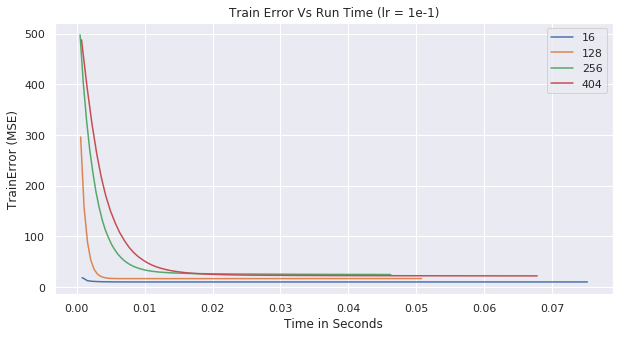

In [192]:
plt.figure(15)
plt.figure(figsize=(10,5))
#plt.plot([i.microseconds/1e6 for i in th_1],te_1)
plt.plot([i.microseconds/1e6 for i in th_2],te_2)
plt.plot([i.microseconds/1e6 for i in th_3],te_3)
plt.plot([i.microseconds/1e6 for i in th_4],te_4)
plt.plot([i.microseconds/1e6 for i in th_5],te_5)

plt.legend(['16','128','256','404'])
plt.xlabel('Time in Seconds')
plt.ylabel('TrainError (MSE)')
plt.title('Train Error Vs Run Time (lr = 1e-1)')

<Figure size 432x288 with 0 Axes>

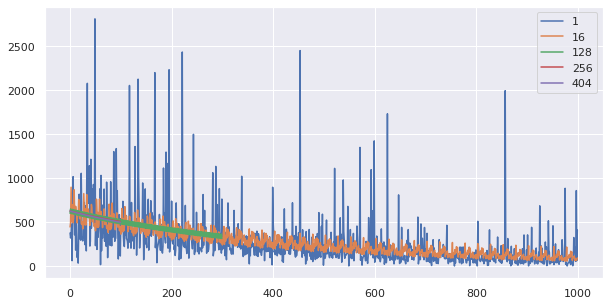

In [194]:

# Ita  = 1e-3

w_1,te_1,th_1,teu_1 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-3, iterations=100, λ=0, bs=1)
w_2,te_2,th_2,teu_2 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-3, iterations=100, λ=0, bs=16)
w_3,te_3,th_3,teu_3 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-3, iterations=100, λ=0, bs=128)
w_4,te_4,th_4,teu_4 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-3, iterations=100, λ=0, bs=256)
w_5,te_5,th_5,teu_5 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-3, iterations=100, λ=0, bs=404)

plt.figure(11)
plt.figure(figsize=(10,5))
plt.plot([i for i in range(len(teu_1))][:1000],teu_1[0:1000])
plt.plot([i for i in range(len(teu_2))][:1000],teu_2[0:1000])
plt.plot([i for i in range(len(teu_3))][:1000],teu_3[0:1000])
plt.plot([i for i in range(len(teu_4))][:1000],teu_4[0:1000])
plt.plot([i for i in range(len(teu_5))][:1000],teu_5[0:1000])

plt.figure(12)

plt.legend(['1','16','128','256','404'])

In [195]:
np.mean(te_5[-100:-1])

557.6817333373807

Text(0.5, 1.0, 'Train Error Vs Run Time (lr = 1e-3)')

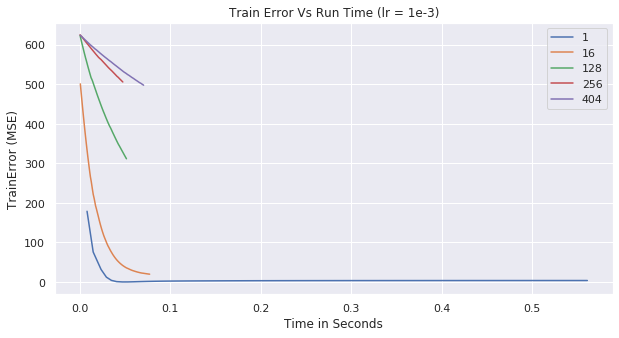

In [197]:
plt.figure(figsize=(10,5))
plt.plot([i.microseconds/1e6 for i in th_1],te_1)
plt.plot([i.microseconds/1e6 for i in th_2],te_2)
plt.plot([i.microseconds/1e6 for i in th_3],te_3)
plt.plot([i.microseconds/1e6 for i in th_4],te_4)
plt.plot([i.microseconds/1e6 for i in th_5],te_5)

plt.legend(['1','16','128','256','404'])
plt.xlabel('Time in Seconds')
plt.ylabel('TrainError (MSE)')
plt.title('Train Error Vs Run Time (lr = 1e-3)')

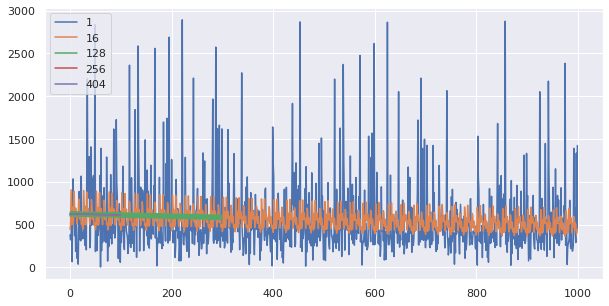

In [199]:
# Ita = 1e-4

w_1,te_1,th_1,teu_1 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-4, iterations=100, λ=0, bs=1)
w_2,te_2,th_2,teu_2 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-4, iterations=100, λ=0, bs=16)
w_3,te_3,th_3,teu_3 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-4, iterations=100, λ=0, bs=128)
w_4,te_4,th_4,teu_4 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-4, iterations=100, λ=0, bs=256)
w_5,te_5,th_5,teu_5 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-4, iterations=100, λ=0, bs=404)

plt.figure(figsize=(10,5))
plt.plot([i for i in range(len(teu_1))][:1000],teu_1[0:1000])
plt.plot([i for i in range(len(teu_2))][:1000],teu_2[0:1000])
plt.plot([i for i in range(len(teu_3))][:1000],teu_3[0:1000])
plt.plot([i for i in range(len(teu_4))][:1000],teu_4[0:1000])
plt.plot([i for i in range(len(teu_5))][:1000],teu_5[0:1000])


plt.legend(['1','16','128','256','404'])

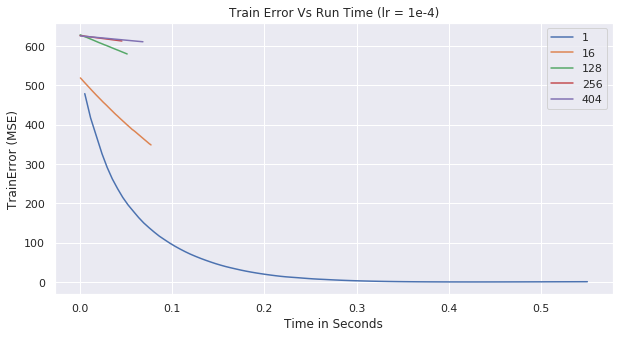

In [201]:
plt.figure(figsize=(10,5))
plt.plot([i.microseconds/1e6 for i in th_1],te_1)
plt.plot([i.microseconds/1e6 for i in th_2],te_2)
plt.plot([i.microseconds/1e6 for i in th_3],te_3)
plt.plot([i.microseconds/1e6 for i in th_4],te_4)
plt.plot([i.microseconds/1e6 for i in th_5],te_5)

plt.legend(['16','128','256','404'])
plt.xlabel('Time in Seconds')
plt.ylabel('TrainError (MSE)')
plt.title('Train Error Vs Run Time (lr = 1e-4)')
plt.legend(['1','16','128','256','404'])

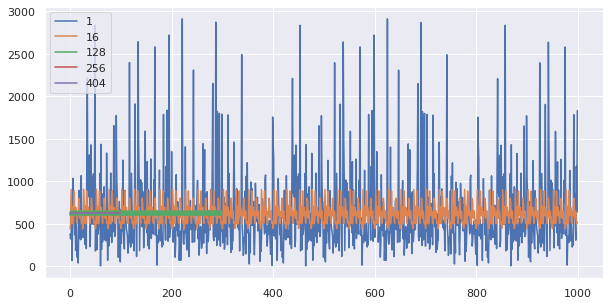

In [203]:



# Ita  = 1e-6
w_1,te_1,th_1,teu_1 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-6, iterations=100, λ=0, bs=1)
w_2,te_2,th_2,teu_2 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-6, iterations=100, λ=0, bs=16)
w_3,te_3,th_3,teu_3 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-6, iterations=100, λ=0, bs=128)
w_4,te_4,th_4,teu_4 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-6, iterations=100, λ=0, bs=256)
w_5,te_5,th_5,teu_5 = batchGradientDescent(X, y, w = np.random.randn(14,1), lr=1e-6, iterations=100, λ=0, bs=404)

plt.figure(figsize=(10,5))
plt.plot([i for i in range(len(teu_1))][:1000],teu_1[0:1000])
plt.plot([i for i in range(len(teu_2))][:1000],teu_2[0:1000])
plt.plot([i for i in range(len(teu_3))][:1000],teu_3[0:1000])
plt.plot([i for i in range(len(teu_4))][:1000],teu_4[0:1000])
plt.plot([i for i in range(len(teu_5))][:1000],teu_5[0:1000])


plt.legend(['1','16','128','256','404'])

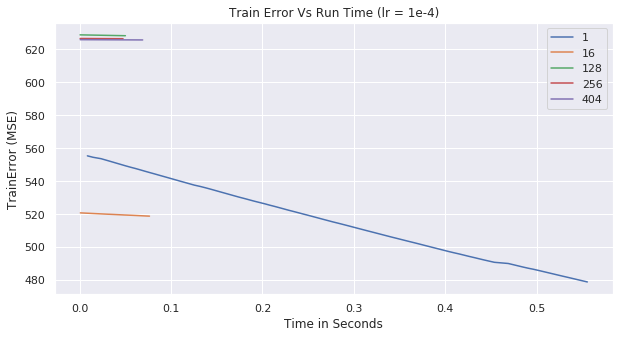

In [204]:
plt.figure(figsize=(10,5))
plt.plot([i.microseconds/1e6 for i in th_1],te_1)
plt.plot([i.microseconds/1e6 for i in th_2],te_2)
plt.plot([i.microseconds/1e6 for i in th_3],te_3)
plt.plot([i.microseconds/1e6 for i in th_4],te_4)
plt.plot([i.microseconds/1e6 for i in th_5],te_5)

plt.legend(['16','128','256','404'])
plt.xlabel('Time in Seconds')
plt.ylabel('TrainError (MSE)')
plt.title('Train Error Vs Run Time (lr = 1e-4)')
plt.legend(['1','16','128','256','404'])

### Conclusion:

From the above plots it can seen that the pair (lr =1e-1, B = 16) makes up for the best parameters for the problem under consideration. For (lr=1e-1,B=1) the convergence is fastest, but as we know for smaller batch size it will not reach minima but osciallate around it. This can be clearly seen from the plot where the train error for B=1 is seen oscillating about a converged mean train error (i.e oscillation in TrainErro over flatten slope). It can be seen from time vs train error plot that B=1 converges fastest as it learns from every training sample, but it takes beating when it comes to stability (noisy).

Below table compares Paramter values and approximate converged TrainError values
As we reduced the lr, the converged trainerror increases, and time taken also increases.

## Tuned Lr and B values are (lr,B) = (1e-1,128)

| Lr       | B   | Converged TrainError | Time to convergence |
|----------|-----|----------------------|---------------------|
| 1.00E-01 | 1   | 12                   | 0.0009              |
|          | 16  | 10.09                | 0.001               |
|          | 128 | 16.77                | 0.005               |
|          | 256 | 25                   | 0.02                |
|          | 404 | 22.18                | 0.02                |
|          |     |                      |                     |
| 1.00E-03 | 1   | 10                   | 0.005               |
|          | 16  | 122                  | 0.015               |
|          | 128 | 444                  | 0.01                |
|          | 256 | 562                  | 0.01                |
|          | 404 | 557                  | 0.015               |
|          |     |                      |                     |
| 1.00E-04 |     |                      |                     |
|          | 1   | 50                   | 0.5                 |
|          | 16  | 431                  | 0.15                |
|          | 128 | 603                  | 0.01                |
|          | 256 | 619                  | 0.01                |
|          | 404 | 618                  | 0.1                 |

### Question 7 (Optional)

1. Does the model perform better if polynomial features are added (Use sklearn.preprocessing.PolynomialFeatures to test it out).


2. Does the optimal value of λ (regularization constant) change with this new set of features added.

## References

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

Author: Parth Jaggi